# Task 2

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get started with this predictive modeling task. I will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, I must explore the data in order to better understand what I have and the statistical properties of the dataset.

In [41]:
# imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 14})

In [42]:
df = pd.read_csv('/Users/irasafonik/customer_booking.csv', encoding='latin1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [43]:
df.shape

(50000, 14)

In [44]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

#### Sales Channel

In [46]:
per_internet = df.sales_channel.value_counts().values[0]  / df.sales_channel.count() *100
per_mobile = df.sales_channel.value_counts().values[1]  / df.sales_channel.count() *100

In [47]:
print(f"Number of bookings done through internet: {per_internet} %")
print(f"Number of bookings done through phone call: {per_mobile} %")

Number of bookings done through internet: 88.764 %
Number of bookings done through phone call: 11.236 %


#### Trip Type

In [48]:
per_round = df.trip_type.value_counts().values[0]/ df.trip_type.count() *100
per_oneway = df.trip_type.value_counts().values[1]/ df.trip_type.count() *100
per_circle = df.trip_type.value_counts().values[2]/ df.trip_type.count() *100

In [49]:
print(f"Percentage of round trips: {per_round} %")
print(f"Percentage of One way trips: {per_oneway} %")
print(f"Percentage of circle trips: {per_circle} %")

Percentage of round trips: 98.994 %
Percentage of One way trips: 0.774 %
Percentage of circle trips: 0.232 %


#### Purchase Lead

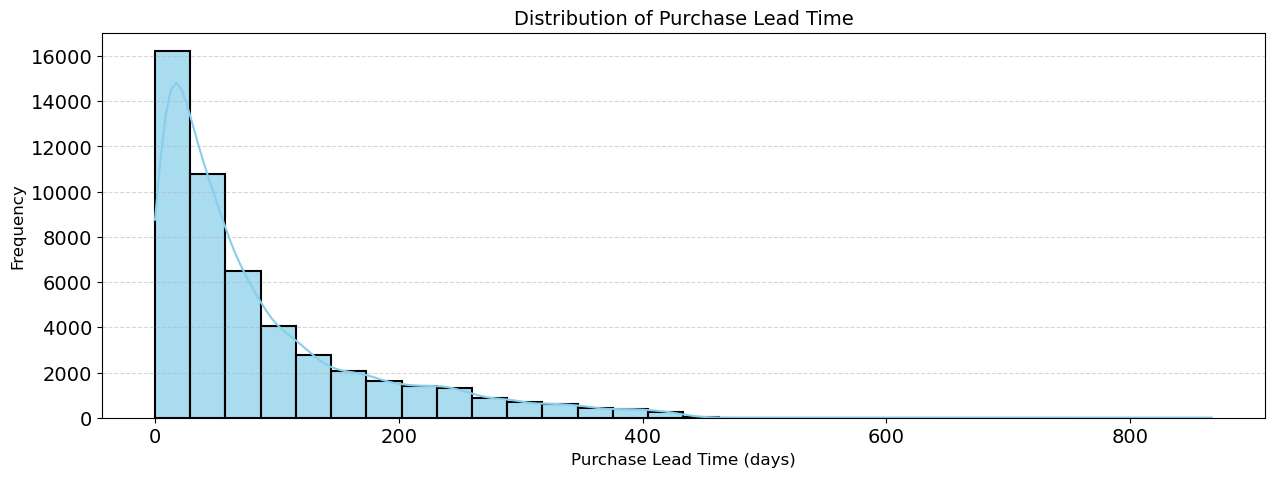

In [50]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="purchase_lead", bins=30, kde=True, color='skyblue', edgecolor='black', linewidth=1.5, alpha=0.7)
plt.xlabel('Purchase Lead Time (days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Purchase Lead Time', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

It appears that there are a small number of bookings made over 2 years before the travel date, which seems highly improbable. This anomaly could potentially be attributed to instances of cancellation and subsequent rebooking within a 6-month period, possibly occurring more than once. Typically, airlines retain tickets for rebooking within a year. However, for the purposes of our analysis, we will treat these instances as outliers. Their inclusion could significantly skew the results of our predictive model.

In [51]:
(df.purchase_lead >600).value_counts()

purchase_lead
False    49992
True         8
Name: count, dtype: int64

If we assume that no customer is booking in advance of more than 1 and half year we will remove all entries with purchase_lead more than 600 days.

In [52]:
df[df.purchase_lead > 600]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
835,3,Internet,RoundTrip,641,46,6,Sun,AKLKUL,Malaysia,1,0,1,8.83,1
6148,1,Internet,RoundTrip,614,19,11,Wed,COKMEL,Australia,0,0,0,8.83,0
24119,1,Internet,RoundTrip,704,23,8,Tue,PNHSYD,Australia,0,0,0,8.58,0
38356,2,Internet,RoundTrip,633,5,10,Sat,HKTOOL,Australia,0,0,1,8.83,0
39417,1,Mobile,RoundTrip,625,5,15,Fri,ICNRGN,Myanmar (Burma),0,0,0,6.62,0
42916,1,Mobile,RoundTrip,605,6,18,Thu,BLRMEL,India,0,0,0,8.83,0
46716,2,Internet,RoundTrip,606,6,6,Fri,HKTTPE,United States,0,0,1,4.67,0
48259,3,Internet,RoundTrip,867,6,7,Mon,KIXMLE,Japan,0,0,1,7.00,1


In [53]:
#filtering the data to have only purchase lead days less than 600 days
df = df[df.purchase_lead <600 ]
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


#### Length Of Stay

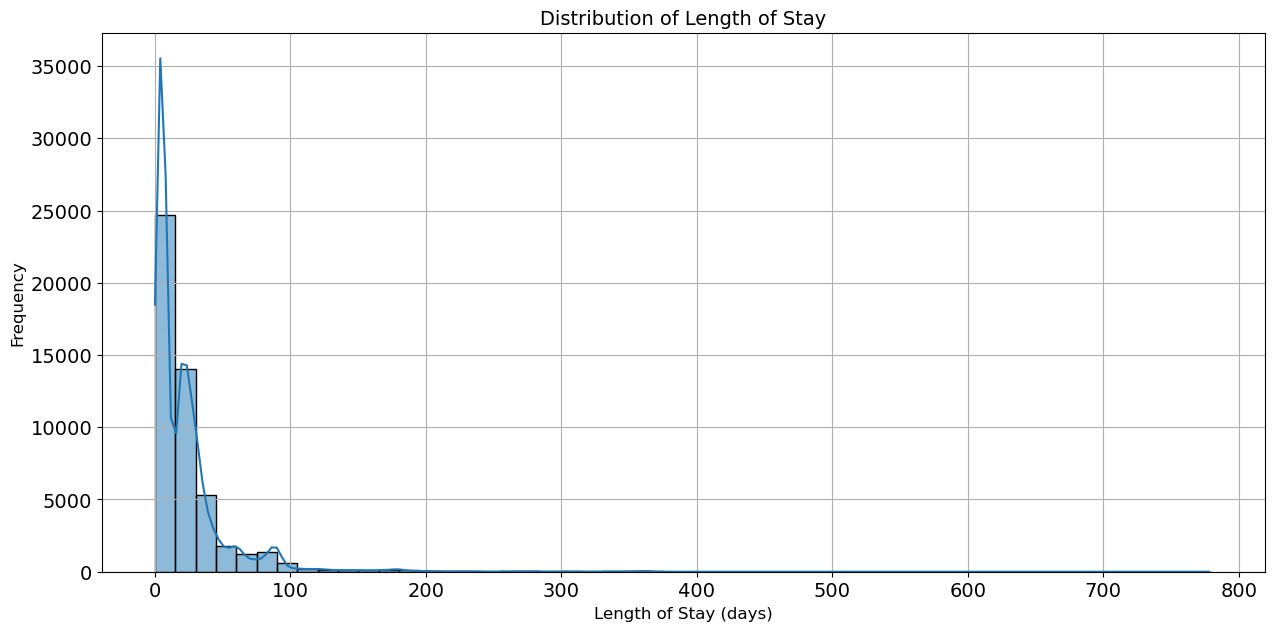

In [54]:
plt.figure(figsize=(15, 7))

sns.histplot(data=df, x="length_of_stay", binwidth=15, kde=True)

plt.grid(True)

plt.xlabel('Length of Stay (days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Length of Stay', fontsize=14)

plt.show()

Let's see how many entries do we have that exceeds length of stay more than 100 days.

In [55]:
(df.length_of_stay> 200).value_counts()

length_of_stay
False    49713
True       279
Name: count, dtype: int64

In [56]:
df[df.length_of_stay> 500].booking_complete.value_counts()

booking_complete
0    9
1    1
Name: count, dtype: int64

We need to have more business knowledge to decide whether to remove these entries with more than 600 days of stay. There are could be many reasons for such bookings. But for now, we will just want to focus on bookings done for length of stay less than 500 days.

In [57]:
#filtering the data to have only length of stay days less than 500 days
df = df[df.purchase_lead <500 ]

#### Flight Day

We will map the flight day with a number of a week.

In [58]:
mapping = {
    "Mon" : 1,
    "Tue" : 2,
    "Wed" : 3,
    "Thu" : 4,
    "Fri" : 5,
    "Sat" : 6,
    "Sun" : 7
}

df.loc[:, 'flight_day'] = df['flight_day'].map(mapping)

In [60]:
df.flight_day.value_counts()

flight_day
1    8100
3    7671
2    7670
4    7423
5    6759
7    6550
6    5809
Name: count, dtype: int64

Most of the customers want to travel on Monday and choose Saturday as least preffered day as flight day.

#### Booking Origin

The chart illustrates the countries from which the highest number of booking applications originated.

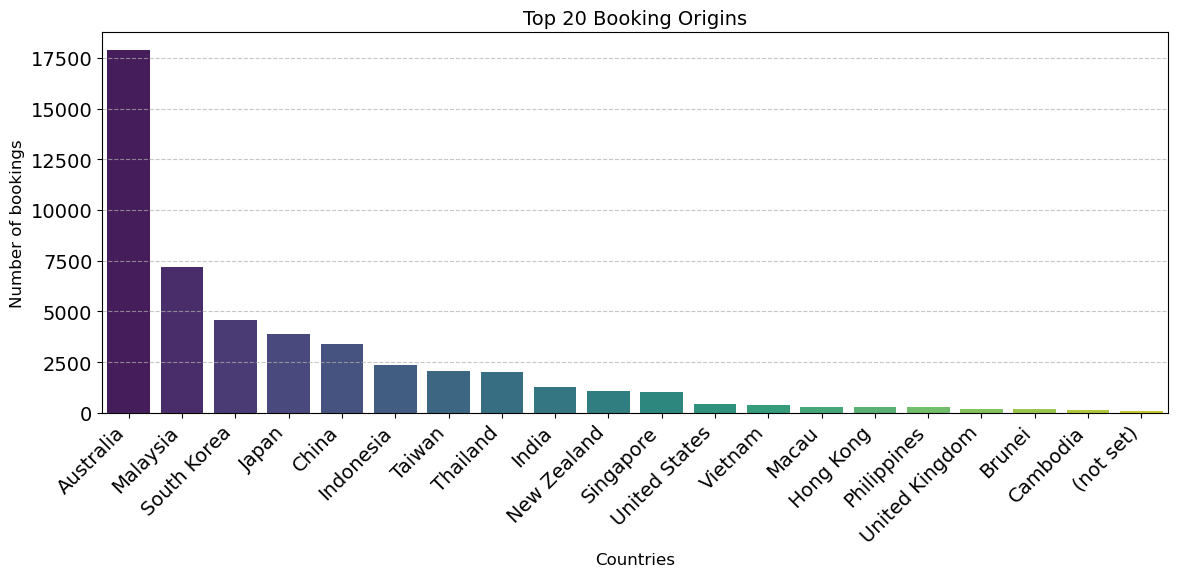

In [64]:
plt.figure(figsize=(12, 6))

sns.barplot(x=df['booking_origin'].value_counts()[:20].index, 
            y=df['booking_origin'].value_counts()[:20].values,
            palette="viridis")

plt.xlabel("Countries", fontsize=12)
plt.ylabel("Number of bookings", fontsize=12)
plt.title("Top 20 Booking Origins", fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The chart below illustrates the countries from which travelers successfully completed their bookings.

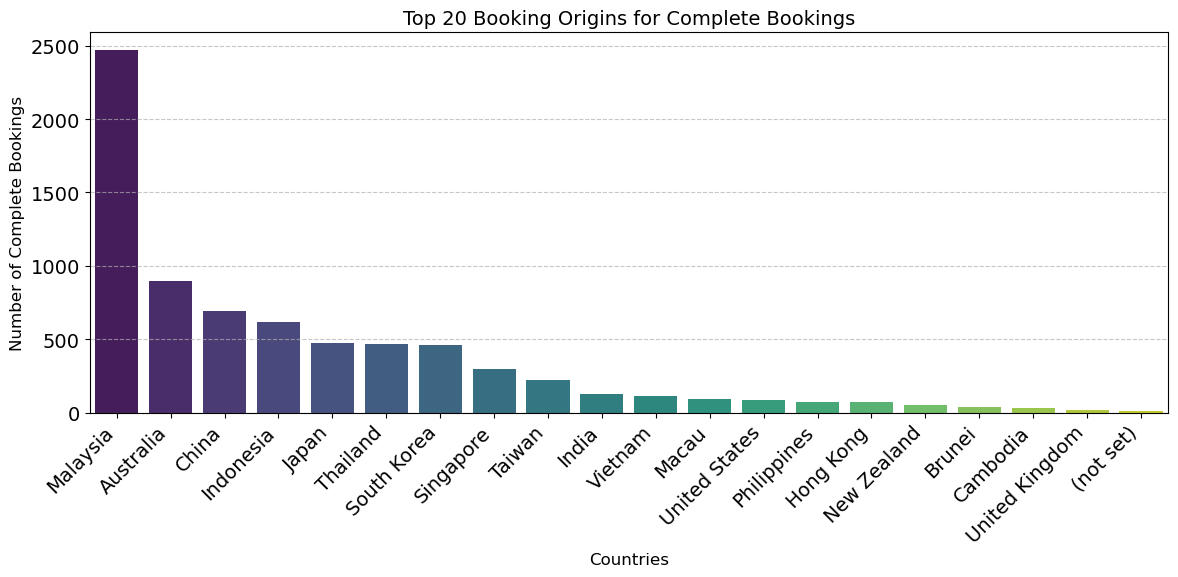

In [66]:
plt.figure(figsize=(12, 6))

sns.barplot(x=df[df.booking_complete == 1]['booking_origin'].value_counts()[:20].index, 
            y=df[df.booking_complete == 1]['booking_origin'].value_counts()[:20].values,
            palette="viridis")

plt.xlabel("Countries", fontsize=12)
plt.ylabel("Number of Complete Bookings", fontsize=12)
plt.title("Top 20 Booking Origins for Complete Bookings", fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Booking complete

In [67]:
successful_booking_per = df.booking_complete.value_counts().values[0] / len(df) * 100

In [68]:
unsuccessful_booking_per = 100-successful_booking_per

In [69]:
print(f"Out of 50000 booking entries only {round(unsuccessful_booking_per,2)} % bookings were successfull or complete.")

Out of 50000 booking entries only 14.96 % bookings were successfull or complete.


### Predictive Model

In [70]:
df = df.reset_index(drop=True)

In [71]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49978,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49979,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49980,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [73]:
df_final = df

In [74]:
from sklearn.preprocessing import OneHotEncoder


#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_final.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)

In [75]:
#drop categorical columns now
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [76]:
#store the label for supervised learning
label = df['booking_complete']

In [77]:
df_final = df_final.drop('booking_complete', axis=1)

In [78]:
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,27,6,9,6,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49978,1,111,6,4,7,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49979,1,24,6,22,6,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49980,1,15,6,11,1,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


#### Normalizaing the values

In [79]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df_final)

In [80]:
#create a dataframe of scled data
scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)

In [81]:
# add the labels back to the dataframe
scaled_df['label']  = label

In [82]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.400769,1.971093,-0.119401,-0.381588,1.096876,0.703587,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
1,-0.579424,0.302987,-0.089895,-1.120618,1.096876,-1.421288,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
2,0.400769,1.759799,-0.030885,1.465988,-0.408618,0.703587,1.538334,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
3,-0.579424,0.125056,0.234662,-0.935861,1.096876,-1.421288,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
4,0.400769,-0.186323,-0.030885,1.096473,-0.408618,0.703587,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,0.400769,-0.642272,-0.502969,-0.012073,1.096876,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49978,-0.579424,0.291867,-0.502969,-0.935861,1.598707,-1.421288,-0.650054,-0.863557,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49979,-0.579424,-0.675634,-0.502969,2.389776,1.096876,-1.421288,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49980,-0.579424,-0.775721,-0.502969,0.357443,-1.412280,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0


#### Correlation matrix

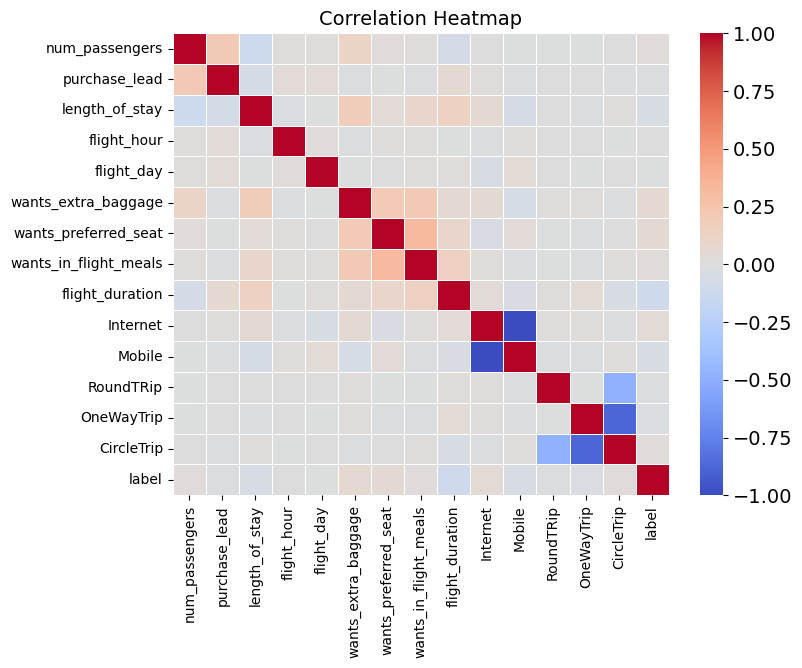

In [90]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

let's split the dataset into train and test sets.

#### Splitting Train and Test Data

In [91]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [95]:
"""
    Create functions to fit and predict the values of whether customer would complete the booking.
    Also functions with metrics to evaluate the model prediction.

"""

def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

#### Random Forest Classifier

In [96]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

#### Checking Training accuracy

In [147]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2) 

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.91, 0.99 and 0.55 respectively


/Users/irasafonik/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9071962118180605

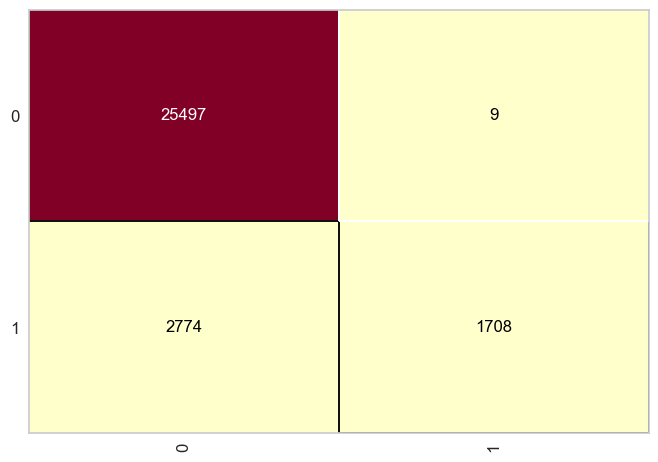

In [151]:
cm = ConfusionMatrix(clf_rf, classes=[0, 1])
cm.fit(X_train, y_train)
cm.score(X_train, y_train)

#### Checking Testing accuracy

In [100]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.86, 0.56 and 0.07 respectively


0.8554566369910973

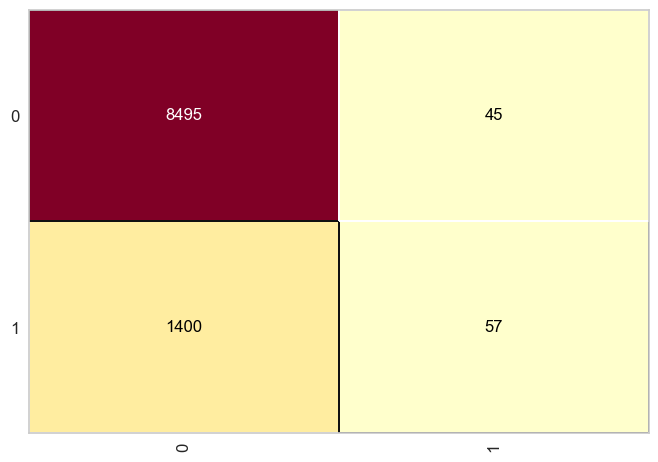

In [101]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

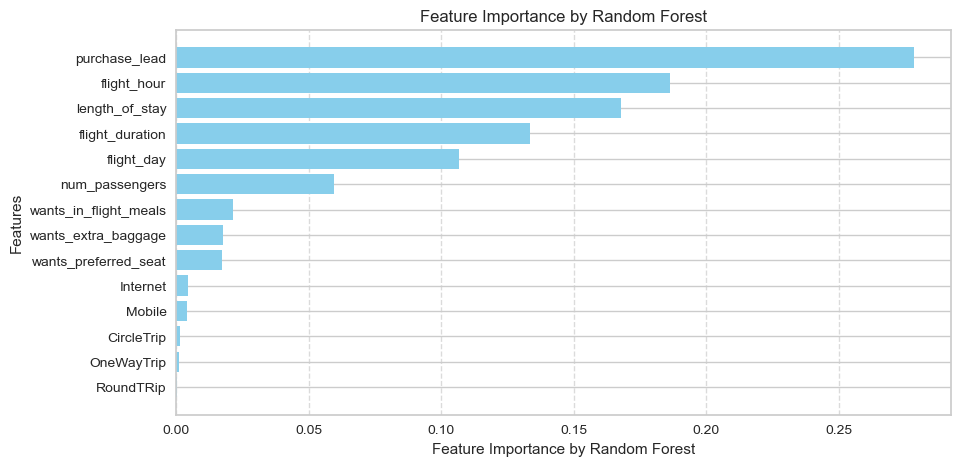

In [104]:
plt.figure(figsize=(10,5))

sorted_idx = clf_rf.feature_importances_.argsort()

plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx], color='skyblue')

plt.xlabel("Feature Importance by Random Forest")
plt.ylabel("Features")
plt.title("Feature Importance by Random Forest")

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

One major problem behind getting low F1 score is imbalanced dataset. We have higher entries that are classified 0 than 1. We could reduce the number of entries that are classified 0 to be equal around the number of entries that are classified as 1.

#### Balancing the dataset

In [105]:
scaled_df.label.value_counts()

label
0    42506
1     7476
Name: count, dtype: int64

In [106]:
#create a dataframe having all labels 0 with 10000 samples
scaled_df_0 = scaled_df[scaled_df.label ==0].sample(n=8000)

In [107]:
#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)

In [108]:
#shuffle the dataframe rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [109]:
scaled_df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,-0.579424,0.069453,-0.561979,0.542200,0.093214,-1.421288,-0.650054,-0.863557,-1.741921,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
1,-0.579424,-0.386496,-0.148906,0.911715,0.093214,0.703587,1.538334,1.158002,0.195526,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
2,1.380962,1.137040,-0.089895,1.281231,0.595045,0.703587,-0.650054,1.158002,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
3,-0.579424,0.102815,-0.532474,-0.566346,-1.412280,-1.421288,-0.650054,-0.863557,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
4,0.400769,-0.853566,-0.532474,-0.196830,-0.408618,0.703587,1.538334,1.158002,-0.439155,-2.810681,2.810681,-0.048231,-0.088336,0.100826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15471,-0.579424,-0.797962,-0.591484,-0.566346,-1.412280,-1.421288,1.538334,-0.863557,-0.185282,-2.810681,2.810681,-0.048231,-0.088336,0.100826,1
15472,-0.579424,0.047211,-0.532474,-0.196830,0.595045,-1.421288,-0.650054,1.158002,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
15473,-0.579424,-0.775721,-0.591484,-0.935861,-0.910449,0.703587,-0.650054,-0.863557,-0.185282,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
15474,-0.579424,-0.898048,0.470704,0.172685,-0.408618,0.703587,1.538334,1.158002,0.870293,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0


In [110]:
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [111]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)

In [112]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

recall = round(recall_score(y_test, y_pred_test),2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively") 

Accuracy, precision, recall and f1-score for training data are 0.61, 0.6, 0.59, 0.63 and 0.59 respectively


0.6124031007751938

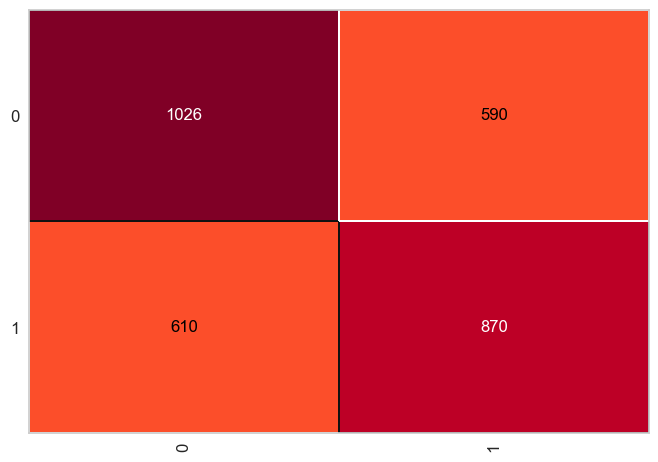

In [113]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

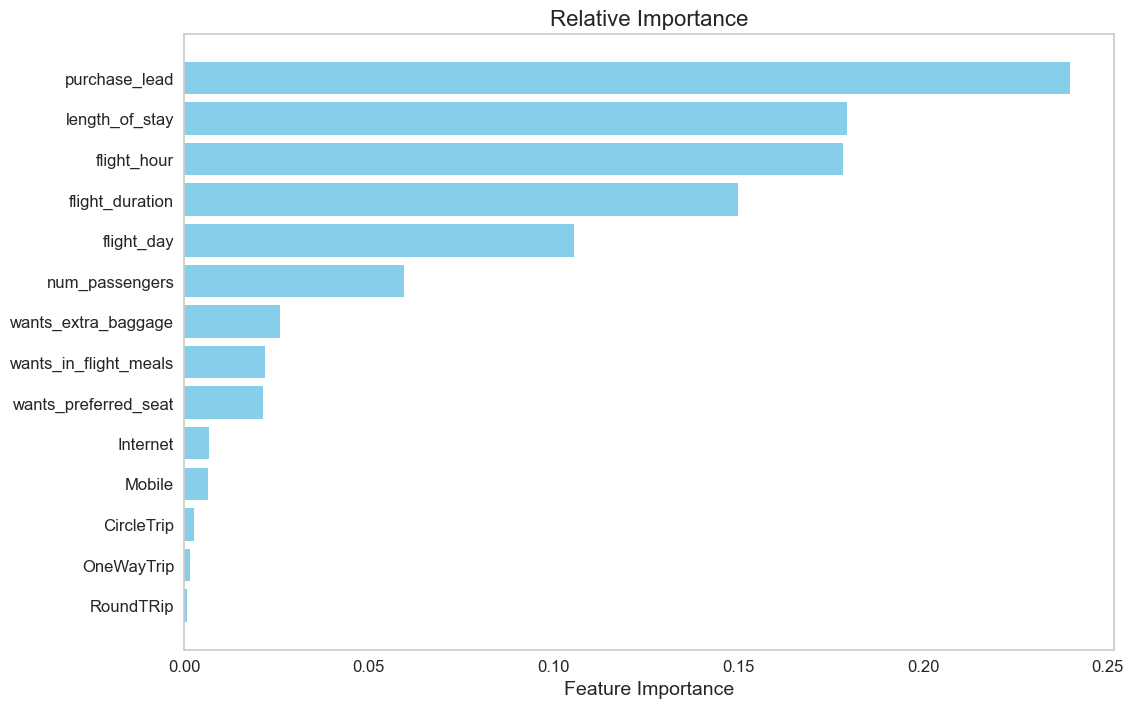

In [144]:
plt.figure(figsize=(12, 8))

sorted_idx = clf_rf.feature_importances_.argsort()

plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx], color='skyblue')

plt.xlabel("Feature Importance", fontsize=14)
plt.title("Relative Importance", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(False) 

plt.show()

#### Mutual Information

In [117]:
X= df.drop('booking_complete',axis=1)
y= df.booking_complete         

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [118]:
X.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [119]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores

route                    0.052532
booking_origin           0.047664
flight_duration          0.018217
wants_extra_baggage      0.010131
wants_in_flight_meals    0.006835
length_of_stay           0.006720
num_passengers           0.002334
trip_type                0.001887
purchase_lead            0.001046
flight_hour              0.000961
wants_preferred_seat     0.000953
sales_channel            0.000310
flight_day               0.000000
Name: MI Scores, dtype: float64

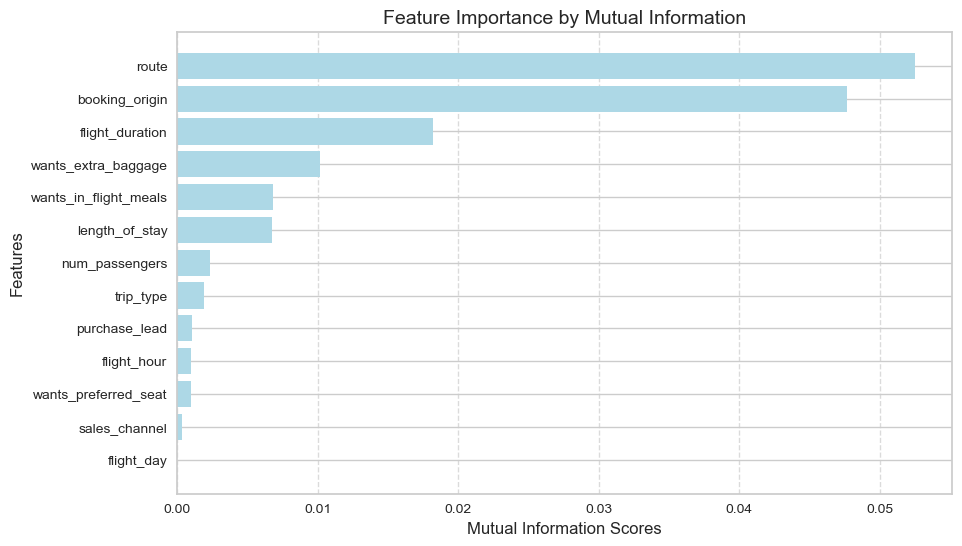

In [121]:
def plot_mi_scores(scores):
    # Sort scores in ascending order
    scores = scores.sort_values(ascending=True)
    
    # Create a horizontal bar plot with customized colors
    plt.figure(figsize=(10, 6))  # Adjust figure size
    plt.barh(scores.index, scores, color='lightblue')  # Set bar color
    plt.xlabel("Mutual Information Scores", fontsize=12)  # Set x-axis label with font size
    plt.ylabel("Features", fontsize=12)  # Set y-axis label with font size
    plt.title("Feature Importance by Mutual Information", fontsize=14)  # Set title with font size
    
    # Add horizontal grid lines for better readability
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Adjust tick font size for better readability
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.show()

# Call the function to plot mutual information scores
plot_mi_scores(mi_scores)

#### Model 1 : Random forest classifier with top 6 features

In [128]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

#assigning the features under a list

features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers']
X= df[features]
#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)
y= df.booking_complete       

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  83.50505151545462
AUC score:  0.5632238136560278


#### Model 2 : Random forest classifier with all features

In [130]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete       

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  84.80544163248975
AUC score:  0.5451077714311143


#### Model 3 : XGB classifier with top 6 features

In [135]:
from xgboost import XGBClassifier

X= df[features]

#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)

y= df.booking_complete    

X_train,X_val,y_train,y_val= dataset(X,y)
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  84.85545663699111
AUC score:  0.5179770169198445


#### Model 4 : XGB classifier with all features

In [136]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete 

X_train,X_val,y_train,y_val= dataset(X,y)


xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  84.64539361808544
AUC score:  0.5307365520135028


Finalizing random forest model with all features as final model, as it has goos accuracy and higher auc score compared to other models

Validating with test data set

In [133]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete       

train_full_X,test_X, train_full_y, test_y = train_test_split(X, y,test_size=0.2,random_state = 0)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(train_full_X, train_full_y)
preds= forest_model.predict(test_X)

print('ACCURACY: ',accuracy_score(test_y,preds)*100)
print('AUC score: ',roc_auc_score(test_y,preds))

ACCURACY:  85.11553466039811
AUC score:  0.5528036306305447
